# Classification

Download the fruits data [here](https://drive.google.com/file/d/1M8tiAWDZclABJN1Meq9oEHCLJTNyHdpP/view?usp=share_link)

In [46]:
# import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_classification

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

# Import validation
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

In [54]:
fruit_data = pd.read_csv("../Data/fruits_data_ext.csv") # Load the fruits dataset
fruits_X = np.array([fruit_data['width'], fruit_data['height']]).T  # Features. We'll pick 2
fruits_y = np.array([fruit_data['fruit_label']]).T.reshape([-1])  # Labels

# Convert everything to a np array
fruits_x, fruits_y = np.asarray(fruits_X), np.asarray(fruits_y)

print (fruits_X.shape, fruits_y.shape)

(177, 2) (177,)


(800, 2) (200, 2) (800,) (200,)


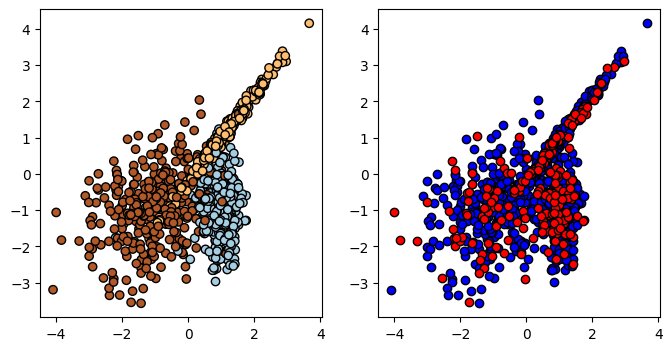

In [31]:
# we create 100 separable points
X, y = make_classification(n_samples = 1000, n_features=2, n_classes = 3, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

# Plot train / test data
_, axes = plt.subplots (1,2, figsize=(8,4))
axes[0].scatter(X[:, 0], X[:, 1], c = y, edgecolors='k', cmap='Paired')
axes[1].scatter(X_train[:, 0], X_train[:, 1], c='b', edgecolors='k')
axes[1].scatter(X_test [:, 0], X_test [:, 1], c='r', edgecolors='k')

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [55]:
import sklearn

def plot_decision_boundary (clf, x, y, res=None, n_points=None, offset=0.1, ax = None, ax_names = None):
    #
    assert x.shape[1] == 2, ValueError('Num features (cols) must be 2. Current: {0}'.format(x.shape[1]))
    if not n_points and not res: n_points = 50
    
    # Min max values for the decision bounding grid
    h_min, h_max = x[:, 0].min()-offset, x[:, 0].max()+offset
    v_min, v_max = x[:, 1].min()-offset, x[:, 1].max()+offset

    # Create the grid
    if n_points: 
        h_array = np.linspace( h_min , h_max , n_points)
        v_array = np.linspace( v_min , v_max , n_points)
    else:
        h_array = np.arange( h_min , h_max , res)
        v_array = np.arange( v_min , v_max , res)
        
    h_grid, v_grid = np.meshgrid(h_array, v_array)

    # Predict
    predictions = clf.predict(np.c_[h_grid.ravel(), v_grid.ravel()])
    
    # Reshape back to original dim
    predictions = predictions.reshape( h_grid.shape )
    
    # Draw everything
    if ax == None: _, ax = plt.subplots (figsize=(7,5))
    ax.pcolormesh( h_grid , v_grid , predictions , cmap = plt.cm.Paired)
    ax.contour( h_grid , v_grid , predictions , colors='k', alpha=0.8, linestyles='-', levels=[0,1])

    # show the scatter
    ax.scatter ( x[:, 0] , x[:, 1] , c = y , edgecolors='k', cmap=plt.cm.Paired)
    
    if isinstance(clf, sklearn.svm.SVC):
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors="none", edgecolors="k")

    ax.set_xlim(h_min, h_max)
    ax.set_ylim(v_min, v_max)
    
    if ax_names != None:
        ax.set_xlabel(ax_names[0]), ax.set_ylabel(ax_names[1])

    ax.set_xticks(())
    ax.set_yticks(())



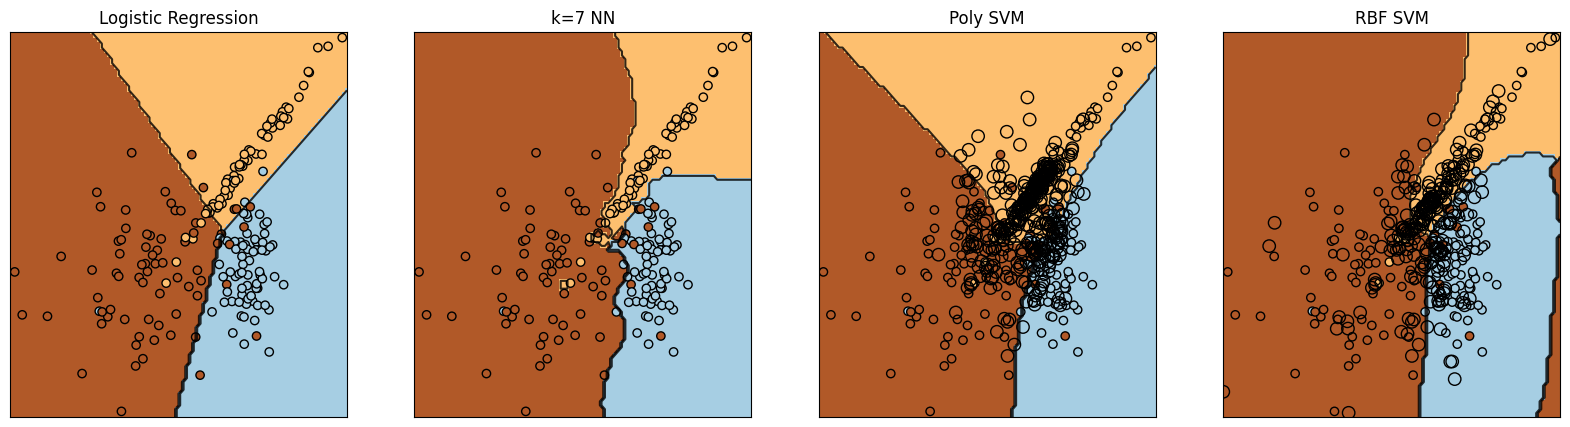

In [56]:
models = [ LogisticRegression() , kNN(n_neighbors=7) , SVC(kernel='poly') , SVC(kernel='rbf') ]
names = ['Logistic Regression', 'k=7 NN' , 'Poly SVM' , 'RBF SVM']

_, axes = plt.subplots(1, len(models), figsize = (5 * len(models),5))
predictions = {}

# fit the models
for name, model, ax in zip(names, models, axes) :
    #
    # print (name, '\t', model)
    model.fit( X_train , y_train )
    predictions[name] = model.predict(X_test)

    # Plot everything
    plot_decision_boundary (clf = model, x = X_test, y = y_test, n_points=100, offset=0.1, ax = ax)
    ax.set_title(name)

plt.show()

## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

############# Results for Logistic Regression ##############
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.880  	   0.880  	   0.880  	   0.880  	

#################### Results for k=7 NN ####################
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.915  	   0.915  	   0.915  	   0.915  	

################### Results for Poly SVM ###################
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.860  	   0.860  	   0.860  	   0.860  	

################### Results for RBF SVM ####################
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.910  	   0.910  	   0.910  	   0.910  	



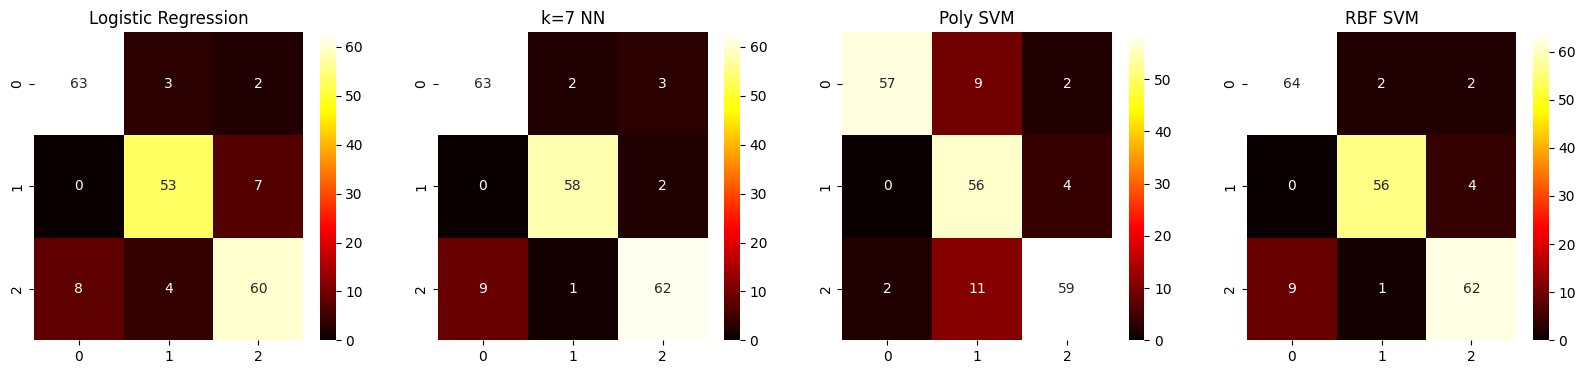

In [61]:
_, axes = plt.subplots(1, len(models) , figsize = (len(models)*5,4))

# Compute metrics - plot confusion matrix
for name, ax in zip(names, axes):
  # print ("########----- Results for {0} -----########".format( name ))
  print (" Results for {0} ".format( name ).center(60, '#') )
  accuracy = accuracy_score( y_test , predictions[name] )
  precision = precision_score( y_test , predictions[name] , average = "micro")
  recall = recall_score( y_test , predictions[name] , average = "micro")
  f1 = f1_score( y_test , predictions[name] , average = "micro")
  cm = confusion_matrix( y_test , predictions[name] )
  ##--------------
  print("-- Acc --\t -- Prec --\t -- Rec --\t -- F1 --  ")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t   {3:.3f}  \t\n".format(accuracy, precision, recall, f1))
  # print(cm)
  sns.heatmap(cm, cmap = "hot", annot = True, ax = ax)
  ax.set_title( name )

## Cross validation

In [62]:
models = [ LogisticRegression() , kNN(n_neighbors=7) , SVC(kernel='poly') , SVC(kernel='rbf') ]
names = ['Log Reg', 'k=7 NN' , 'Poly SVM' , 'RBF SVM']

# _, axes = plt.subplots(1, len(models), figsize = (5 * len(models),5))
predictions = {}

cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=1)

# fit the models
for name, model in zip(names, models) :
    #
    cross_val_score_ = cross_val_score(model, X_train, y_train, cv=cv)
    print (name, ':\t', cross_val_score_, '\tmean: ', np.mean(cross_val_score_))



Log Reg :	 [0.95    0.875   0.85625 0.85625 0.875  ] 	mean:  0.8825
k=7 NN :	 [0.94375 0.90625 0.91875 0.875   0.89375] 	mean:  0.9075
Poly SVM :	 [0.91875 0.85625 0.84375 0.84375 0.8375 ] 	mean:  0.86
RBF SVM :	 [0.96875 0.9125  0.9     0.88125 0.9    ] 	mean:  0.9125


In [63]:
models = [ LogisticRegression() , kNN(n_neighbors=7) , SVC(kernel='poly') , SVC(kernel='rbf') ]
names = ['Log Reg', 'k=7 NN' , 'Poly SVM' , 'RBF SVM']

predictions = {}

cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=1)

# fit the models
for name, model in zip(names, models) :
    #
    for i, (splits_train, splits_val) in enumerate(cv.split(X_train, y_train)):
      X_train_cv = X_train[splits_train]
      y_train_cv = y_train[splits_train]
      X_val_cv  = X_train[splits_val]
      y_val_cv  = X_train[splits_val]

      model.fit(X_train_cv, y_train_cv)

      predictions[name + '_{0}'.format(i)] = model.predict(X_test)

In [64]:
predictions.keys()

dict_keys(['Log Reg_0', 'Log Reg_1', 'Log Reg_2', 'Log Reg_3', 'Log Reg_4', 'k=7 NN_0', 'k=7 NN_1', 'k=7 NN_2', 'k=7 NN_3', 'k=7 NN_4', 'Poly SVM_0', 'Poly SVM_1', 'Poly SVM_2', 'Poly SVM_3', 'Poly SVM_4', 'RBF SVM_0', 'RBF SVM_1', 'RBF SVM_2', 'RBF SVM_3', 'RBF SVM_4'])

## En datos reales

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

(1797, 64)


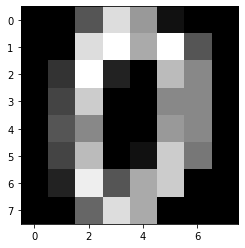

In [ ]:
digits = load_digits()
print(digits.data.shape)

plt.imshow(digits.images[0].reshape(8,8), cmap="gray")

Evalúe los distintos algoritmos entrenando con esta base de datos.

# Regression

In [77]:
# import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_regression

# import classifiers
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Import validation
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

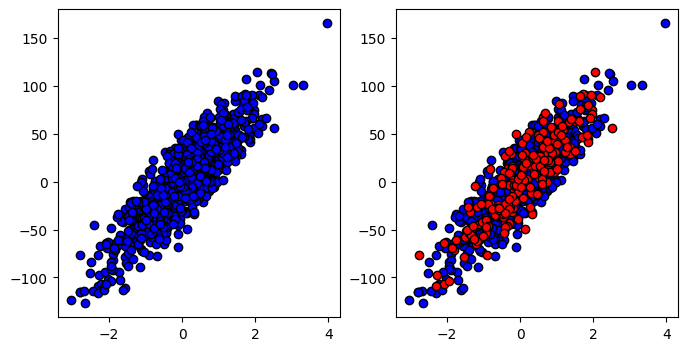

In [78]:
X, y = make_regression(n_samples = 1000, n_features = 1 , noise = 20 , random_state = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

np.random.seed(0)
# y_test = y_test + np.random.normal(len(y_test)) * 0.1

# Plot train / test data
_, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].scatter(X, y, c='b', edgecolors='k')
axes[1].scatter(X_train, y_train, c = 'b', edgecolors='k')
axes[1].scatter(X_test , y_test , c = 'r', edgecolors='k')

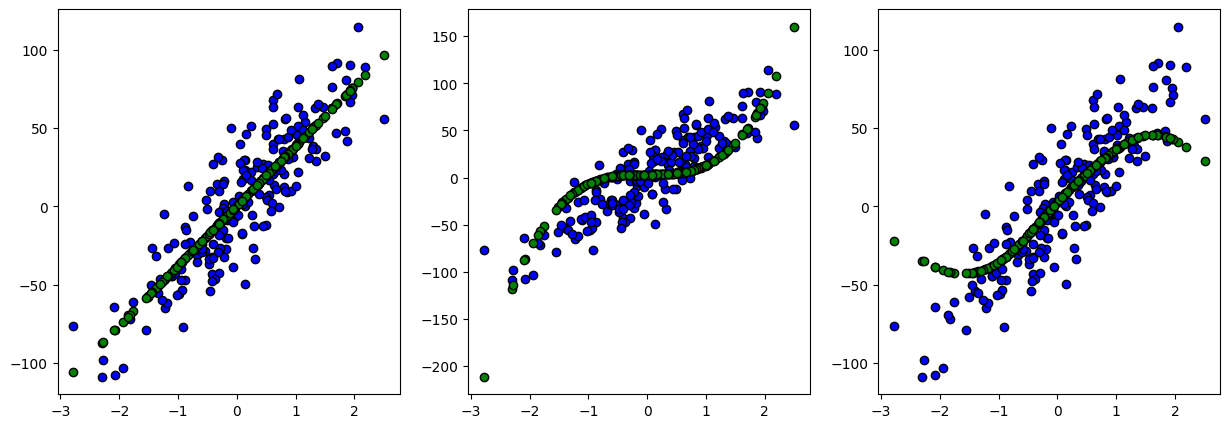

In [86]:
# Train a linear regression
models = [ LinearRegression(), SVR(kernel='poly'), SVR(kernel='rbf') ]
names  = [ 'Linear regression', 'Poly SVR', 'RBF SVR']
_, axes = plt.subplots(1, len(models), figsize=(5*len(models), 5))
predictions = {}

for name, model, ax in zip(names, models, axes):
  #
  model.fit(X_train, y_train)
  predictions[name] = model.predict (X_test)

  ax.scatter (X_test, y_test, c = 'b', edgecolors='k')
  ax.scatter (X_test, predictions[name], c = 'g', edgecolors='k')


## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [88]:
# Compute MAE and MSE

for name in names:
  print ('Results for {0} '.format(name).center(50, '-'))
  mse_ = mean_squared_error(y_test, predictions[name])
  mae_ = mean_absolute_error(y_test, predictions[name])
  print ('MSE: {0}'.format(mse_))
  print ('MAE: {0} \n'.format(mae_))

----------Results for Linear regression ----------
MSE: 419.7565266289776
MAE: 16.391075167258826 

--------------Results for Poly SVR ---------------
MSE: 930.8078519032181
MAE: 24.375972665034638 

---------------Results for RBF SVR ---------------
MSE: 591.1718995764088
MAE: 19.1048080810608 



## Cross validation

In [99]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

# DataFrame de ejemplo
df = pd.DataFrame({
    "x1": [1,2,3,4,5,6,7,8,9,10],
    "x2": [0.5,1.1,1.3,2.4,2.9,3.2,3.8,4.1,4.9,5.0],
    "y":  [1.2,2.3,2.9,4.1,5.0,5.8,7.1,8.2,9.1,9.8]
})

X = df.drop(columns="y").values
y = df["y"].values

# Modelo de regresión
model = LinearRegression()

# K-Fold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Validación cruzada con R^2
scores = cross_val_score(model, X, y, cv=cv, scoring="r2")

print("R^2 por fold:", scores)
print("R^2 medio:", scores.mean())


R^2 por fold: [0.99732527 0.99264782 0.99274267 0.99624786 0.99845654]
R^2 medio: 0.9954840329652912


In [103]:
models = [ LinearRegression(), SVR(kernel='poly'), SVR(kernel='rbf') ]
names  = [ 'Linear Reg', 'Poly SVR', 'RBF SVR']

# _, axes = plt.subplots(1, len(models), figsize = (5 * len(models),5))
predictions = {}

cv = KFold(n_splits=5, shuffle = True, random_state=1)

# fit the models
for name, model in zip(names, models) :
    #
    cross_val_score_ = cross_val_score(model, X_train, y_train, cv=cv, scoring="neg_mean_absolute_error")
    print (name, ':\t', cross_val_score_, '\tmean: ', np.mean(cross_val_score_))



Linear Reg :	 [-14.9858776  -15.37416994 -16.40741373 -15.75830829 -17.92346672] 	mean:  -16.089847254369566
Poly SVR :	 [-22.48398489 -26.14792406 -27.37417834 -25.17832712 -23.89576287] 	mean:  -25.01603545516216
RBF SVR :	 [-16.88466344 -20.95222177 -19.4958101  -21.18998463 -18.242     ] 	mean:  -19.352935988356904


In [106]:
models = [ LinearRegression(), SVR(kernel='poly'), SVR(kernel='rbf') ]
names  = [ 'Linear Reg', 'Poly SVR', 'RBF SVR']

predictions = {}

cv = KFold(n_splits=5, shuffle = True, random_state=1)

# fit the models
for name, model in zip(names, models) :
    #
    for i, (splits_train, splits_val) in enumerate(cv.split(X_train, y_train)):
      X_train_cv = X_train[splits_train]
      y_train_cv = y_train[splits_train]
      X_val_cv  = X_train[splits_val]
      y_val_cv  = X_train[splits_val]

      model.fit(X_train_cv, y_train_cv)

      predictions[name + '_{0}'.format(i)] = model.predict(X_test)

In [105]:
predictions.keys()

dict_keys(['Linear Reg_0', 'Linear Reg_1', 'Linear Reg_2', 'Linear Reg_3', 'Linear Reg_4', 'Poly SVR_0', 'Poly SVR_1', 'Poly SVR_2', 'Poly SVR_3', 'Poly SVR_4', 'RBF SVR_0', 'RBF SVR_1', 'RBF SVR_2', 'RBF SVR_3', 'RBF SVR_4'])